# Breaking Bad Network Analysis

In this Jupyter Notebook I show how to conduct a network analysis on a graph representing interactions among characters in a plot.
The Graph that we take in consideration was extracted by the famous tv-show *Breaking Bad*.
The graph was created by [Francesco Bailo](https://github.com/fraba/bb_project) and it's available at this [link](http://www.francescobailo.net/wordpress/wp-content/uploads/data/breaking_bad_social_graph.json).

## Data processing

First we upload the JSON file containing the list of nodes and edges of the graph.

In [1]:
from google.colab import files
file1 = files.upload()

Saving breaking_bad_social_graph.json to breaking_bad_social_graph.json


Then we create the Graph by using the library **NetworkX**. 
Each node is identified by an integer and has a *label* attribute, while each edge has a *weight* corresponding to the importance of that edge.

In [2]:
import networkx as nx
import json
import matplotlib.pyplot as plt


# Opening JSON file
f = open('breaking_bad_social_graph.json',)
file = json.load(f)
edge_lst = file['edges']
node_lst = file['nodes']

G = nx.Graph()

ids_and_labels = [(node['id'], node['label']) for node in node_lst]
for tup in ids_and_labels:
    G.add_node(int(tup[0]), label=tup[1])

for edge in edge_lst:
    G.add_edge(int(edge['source']), int(edge['target']), weight=int(edge['size']))

Then, we download a picture of the graph.




In [ ]:
from matplotlib import pylab

def save_graph(graph,file_name):
  #initialze Figure
  plt.figure(num=None, figsize=(20, 20), dpi=80)
  plt.axis('off')
  fig = plt.figure(1)
  pos = nx.spring_layout(graph)
  nx.draw_networkx_nodes(graph,pos)
  nx.draw_networkx_edges(graph,pos)

  plt.savefig(file_name,bbox_inches="tight")
  files.download(file_name)
  
  pylab.close()
  del fig

#Assuming that the graph g has nodes and edges entered
save_graph(G,"my_graph.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
print("Number of nodes", len(node_lst))
print("Number of edges", len(edge_lst))
print("Average number of edges", len(edge_lst)/len(node_lst))

Number of nodes 131
Number of edges 969
Average number of edges 7.396946564885496


## Centrality measurements

In order to better describe the graph, we sort the nodes by means of their edges and position in the network. The measures that allow us to do so are called *Centrality measures*.

### Degree Centrality

The degree centrality sorts the nodes by means of their **degree** - the number of edges incident to a node -. Since our graph is weighted, also our degrees should be weighted.
Here are the top 10 nodes in the graph of Breaking Bad.

In [ ]:
centrality_dict = G.degree(weight='weight')
sorted_centralities = sorted(centrality_dict, key=lambda tup: tup[1])[::-1]
label_and_centrality = [(id, centrality, G.nodes[id]['label']) for id, centrality in sorted_centralities]
for n in range(10):
  print(n+1, label_and_centrality[n][2],label_and_centrality[n][1] )

1 Walter White 1905
2 Jesse Pinkman 1318
3 Hector "Tio" Salamanca 1261
4 Hank Schrader 891
5 Skyler White 816
6 Gustavo Fring 481
7 Mike Ehrmantraut 391
8 Marie Schrader 388
9 Walter White Jr. 329
10 Saul Goodman 325


### Eigenvector Centrality

The eigenvector centrality is a quite complicate measure of centrality. However, in short, it sorts nodes by means of their connections with nodes that are themselves important.
Here are the top 10 results.

In [ ]:
eigenvector_centrality = nx.eigenvector_centrality(G, weight='weight')
sorted_centralities= sorted(eigenvector_centrality.items(), key=lambda tup: tup[1])[::-1]
label_and_centrality = [(id, centrality, G.nodes[id]['label']) for id, centrality in sorted_centralities]
for n in range(10):
  print(n+1, label_and_centrality[n][2],label_and_centrality[n][1] )



1 Walter White 0.5561191493843385
2 Jesse Pinkman 0.42708451431301075
3 Hector "Tio" Salamanca 0.4142355691562671
4 Skyler White 0.30955904400312917
5 Hank Schrader 0.2893235476754151
6 Gustavo Fring 0.17412505303342482
7 Marie Schrader 0.15224087271812972
8 Mike Ehrmantraut 0.14610452706177082
9 Walter White Jr. 0.13885421319256727
10 Saul Goodman 0.12923470315137206


### Betweenness Centrality

The betweenness centrality is another measure of centrality. It considers the importance of a node by considering the time in which that node falls in the shortest path between other two nodes.
Here are the top 10 results.

In [ ]:
betweenness_centrality = nx.betweenness_centrality(G, weight='weight')
sorted_centralities= sorted(betweenness_centrality.items(), key=lambda tup: tup[1])[::-1]
label_and_centrality = [(id, centrality, G.nodes[id]['label']) for id, centrality in sorted_centralities]
for n in range(10):
  print(n+1, label_and_centrality[n][2],label_and_centrality[n][1] )

1 Hector "Tio" Salamanca 0.20576275188996843
2 Jesse Pinkman 0.1170449841726939
3 Walter White 0.08270477670773245
4 Mike Ehrmantraut 0.08146799332287566
5 Hank Schrader 0.06061627971452165
6 Gustavo Fring 0.05687277378263917
7 Skyler White 0.05333638477153834
8 Steven Gomez 0.04929518194165632
9 Saul Goodman 0.042143871680282885
10 Skinny Pete 0.03900529601913777


## Network properties: small-worldness and degree distribution

However, our network might have some bigger-scale properties.
Small-worldness and peculiar degree distributions might be some of them. 

The purpose of this analysis is to demonstrate that fictional plots might be represented with strongly tied networks that show asymmetries in the distribution of edges. This type of networks, like **small-worlds** or **scale-free networks**, are typical of many systems in biology, physics and social sciences. *These networks are studied because they model many real-world systems*, like neuron cells, protein systems or voters’ networks. For clear reasons, it is extremely interesting for literary studies to discover that fictional plots might be modelled with networks that already have applications in real-world situations. The presence of small-world phenomena regulating fictional stories might suggest a **resemblance between narrative and real-world situations**, thus supporting the Aristotelian theory that every fiction is a mimesis of real-ity.

### Small-world networks

A small-world graph, by analogy with the small-world phenomenon (popularly known as *six degrees of separation*), is a graph in which most of the nodes are not neighbours of each other; however, they are likely to share at least one neighbour and most nodes can be reached by any other node with a small number of steps.
In this type of networks, usually, we have an over-abundance of *hub*s – nodes in the network with a high degree. Through these hubs that are hugely connected, nodes with a relatively small degree can be connected to any other node with a short path.

The small-world coefficient ***σ*** (Sigma) is a simple measure that shows if a network is a small-world - meaning that it has a high clustering coefficient and small path lengths -.
If *σ* > 1 then the considered graph is a small-world.

In [ ]:
# niter are the number of rewiring per edges 
# while nrand is the number of random graphs to create
# in order to compute the coefficient
sigma_bb = nx.sigma(G, niter=10, nrand=10, seed=248)
print(sigma_bb)

1.1155770594120578


### Power-law degree distributions

Small-world networks, as already said, are often related to fat-tailed distributions of degrees. 
Fat-tailed distributions include many types of distributions: the power law distribution, the log-normal distribution and the stretched exponential distribution, among others. Power laws are often studied in network theory since they are index of network *invariance to scale* and *preferential attachment to hubs*. 

In [3]:
pip install powerlaw

  Created wheel for powerlaw: filename=powerlaw-1.4.6-cp36-none-any.whl size=24788 sha256=4db7d792ded01b802498791e4fa0442e60df34c0a65bc2b8b509eba2abceaad4
  Stored in directory: /root/.cache/pip/wheels/e0/27/02/08d0e2865072bfd8d7c655e290521e3feca3fc22f1ac460601
Successfully built powerlaw


Alpha coefficient of the distribution is  1.6557514278086778


Calculating best minimal value for power law fit
/usr/local/lib/python3.6/dist-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


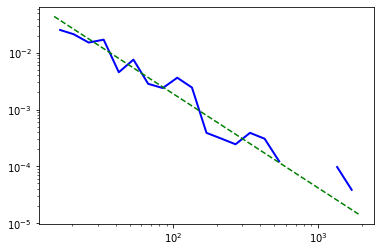

In [5]:
degree_sequence = sorted([d for n, d in G.degree(weight='weight')], reverse=True) # used for degree distribution and powerlaw test
import powerlaw # Power laws are probability distributions with the form:p(x)∝x−α
fit = powerlaw.Fit(degree_sequence) 
print('Alpha coefficient of the distribution is ', fit.power_law.alpha)
fig2 = fit.plot_pdf(color='b', linewidth=2)
fit.power_law.plot_pdf(color='g', linestyle='--', ax=fig2)

Often, distribution that looks like power laws can fit also different fat-tailed models, such as the *truncated power law*. A likelihood test will show that a power law with an exponential cut-off is a better explanation

In [6]:
R, p = fit.distribution_compare('power_law', 'truncated_power_law', normalized_ratio=True)
print (R, p)
# if R is negative it means that the second distribution is preferred over the first

Assuming nested distributions
/usr/local/lib/python3.6/dist-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


-1.8853925412034742 0.022588006941956174


In [7]:
R, p = fit.distribution_compare('power_law', 'lognormal', normalized_ratio=True)
print (R, p)
# if R is negative it means that the second distribution is preferred over the first

-1.3499689685238856 0.1770259369460846


/usr/local/lib/python3.6/dist-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


After different likelihood test and a visualization the degree distribution seems better explainable with a lognormal distribution or a truncated power law.

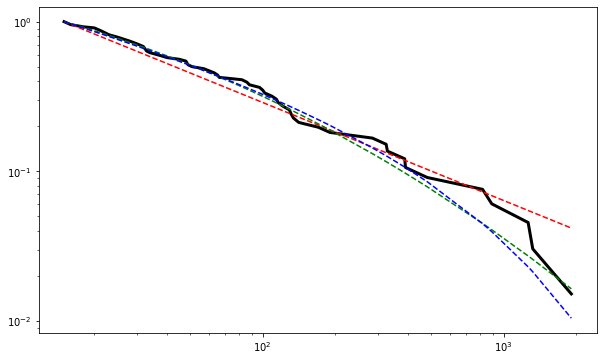

In [8]:
plt.figure(figsize=(10, 6))
fit.distribution_compare('power_law', 'lognormal')
fig4 = fit.plot_ccdf(linewidth=3, color='black')
fit.power_law.plot_ccdf(ax=fig4, color='r', linestyle='--') #powerlaw
fit.lognormal.plot_ccdf(ax=fig4, color='g', linestyle='--') #lognormal
fit.truncated_power_law.plot_ccdf(ax=fig4, color='b', linestyle='--') #truncated_powerlaw

# Network evolution in time

Moreover, small-world networks have demonstrated to be more robust than random graphs, meaning that their structure is more resilient to perturbations. Consequently, what we want to furtherly investigate is that, if the property of small-worldness is given in our characters’ network, it should not disappear due to the deletions of certain nodes. We will follow the evolution of the plot to change the structure of the graph. In the end, we would like to verify that, if the network of Breaking Bad manifests the small-world property, this type of property does not disappear as the graph evolves in time across the 5 seasons of the tv-show.

What we will do is to create a list of nodes corresponding to the characters that die for each season.

In [11]:
deaths_in_s1 = [42, 26]
deaths_in_s2 = [18, 58, 70, 47, 35, 32, 7]
deaths_in_s3 = [16, 194, 65, 82, 44, 33, 60, 11]
deaths_in_s4 = [29, 24, 30, 46, 41, 3, 15, 39]
deaths_in_s5 = [50, 52, 54, 37, 4, 61, 71, 64, 38, 31, 5, 19, 55, 95, 85, 90, 9, 20, 6, 8]



Then we create 5 different graphs by deleting the nodes corresponding to the dead characters. We remove also isolated nodes because they are forbidden in the computation of the sigma coefficient.

In [12]:
G1 = G.copy()
for id in deaths_in_s1:
    G1.remove_node(id)
G2 = G1.copy()
for id in deaths_in_s2:
    G2.remove_node(id)

G3 = G2.copy()
for id in deaths_in_s3:
    G3.remove_node(id)
    isolated_nodes = list(nx.isolates(G3))
    G3.remove_nodes_from(isolated_nodes)

G4 = G3.copy()
for id in deaths_in_s4:
    G4.remove_node(id)
    isolated_nodes = list(nx.isolates(G4))
    G4.remove_nodes_from(isolated_nodes)

G5 = G4.copy()
for id in deaths_in_s5:
    G5.remove_node(id)
    isolated_nodes = list(nx.isolates(G5))
    G5.remove_nodes_from(isolated_nodes)


To demonstrate the resilience of the network, we consider sufficient that the small-world coeffi-cient ***σ*** should not drop to values < 1 after several perturbations of the network.

In [ ]:
sigma1 = nx.sigma(G1, niter=10, nrand=10, seed=248)
print('sigma after deaths in s1', sigma1)

sigma2 = nx.sigma(G2, niter=10, nrand=10, seed=248)
print('sigma after deaths in s2', sigma2)

sigma3 = nx.sigma(G3, niter=10, nrand=10, seed=248)
print('sigma after deaths in s3', sigma3)

sigma4 = nx.sigma(G4, niter=10, nrand=10, seed=248)
print('sigma after deaths in s4', sigma4)

sigma5 = nx.sigma(G5, niter=10, nrand=10, seed=248)
print('sigma after deaths in s5', sigma5)

sigma after deaths in s1 1.1154677921948937
sigma after deaths in s2 1.1225840043418112
sigma after deaths in s3 1.1237803226944318
sigma after deaths in s4 1.145699935595984
sigma after deaths in s5 1.2746014171597286


The network is pretty robust!!